# Exploratory Data Analysis

In [143]:
#import all necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
#importing data
df_all = pd.read_csv("dataset.csv")

In [145]:
# rename the 'Price' column to 'Date'
df_all.rename(columns={'Price': 'Date'}, inplace=True)

# Convert 'Date' to datetime
df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')

# Set the 'Date' column as index
df_all.set_index('Date', inplace=True)

# Check the head and index type
print(df_all.head())
print(df_all.index)

                          gold            usd_inr                dxy  \
Date                                                                   
NaT                       GC=F           USDINR=X           DX-Y.NYB   
NaT                        NaN                NaN                NaN   
2015-01-02              1186.0  63.02799987792969  91.08000183105469   
2015-01-05  1203.9000244140625  63.27799987792969  91.37999725341797   
2015-01-06   1219.300048828125   63.3380012512207               91.5   

                treasury_yield               sp500                 vix  \
Date                                                                     
NaT                       ^TNX               ^GSPC                ^VIX   
NaT                        NaN                 NaN                 NaN   
2015-01-02   2.122999906539917   2058.199951171875  17.790000915527344   
2015-01-05  2.0390000343322754  2020.5799560546875  19.920000076293945   
2015-01-06  1.9630000591278076  2002.6099853515625 

/var/folders/vq/x_32pj256zs5w0j98mhvmdyw0000gn/T/ipykernel_15036/3941061031.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce')


In [146]:
# Check for missing values
print("Missing values:\n", df_all.isnull().sum())

Missing values:
 gold              1
usd_inr           1
dxy               1
treasury_yield    1
sp500             1
vix               1
crude             1
silver            1
btc               1
dtype: int64


In [147]:
#finding data type
print(df_all.dtypes)

gold              object
usd_inr           object
dxy               object
treasury_yield    object
sp500             object
vix               object
crude             object
silver            object
btc               object
dtype: object


In [148]:
# Convert all other columns to numeric
for col in df_all.columns:
    if col != 'Date':
        df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

In [149]:
df_all.dropna()

,gold,usd_inr,dxy,treasury_yield,sp500,vix,crude,silver,btc
Date,,,,,,,,,
2015-01-02,1186.000000,63.028000,91.080002,2.123,2058.199951,17.790001,52.689999,15.734000,315.032013
2015-01-05,1203.900024,63.278000,91.379997,2.039,2020.579956,19.920000,50.040001,16.179001,274.473999
2015-01-06,1219.300049,63.338001,91.500000,1.963,2002.609985,21.120001,47.930000,16.603001,286.188995
2015-01-07,1210.599976,63.568001,91.889999,1.954,2025.900024,19.309999,48.650002,16.510000,294.337006
2015-01-08,1208.400024,63.272999,92.370003,2.016,2062.139893,17.010000,48.790001,16.351000,283.348999
...,...,...,...,...,...,...,...,...,...
2025-05-23,3363.600098,85.974899,99.110001,4.509,5802.819824,22.290001,61.529999,33.442001,107287.796875
2025-05-27,3299.100098,85.158203,99.519997,4.434,5921.540039,18.959999,60.889999,33.146000,108994.640625
2025-05-28,3293.600098,85.360497,99.879997,4.477,5888.549805,19.309999,61.840000,33.000000,107802.328125


## Step 1: Basic Data Overview

In [150]:
# Structure and summary
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2613 entries, NaT to 2025-05-30
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gold            2611 non-null   float64
 1   usd_inr         2611 non-null   float64
 2   dxy             2611 non-null   float64
 3   treasury_yield  2611 non-null   float64
 4   sp500           2611 non-null   float64
 5   vix             2611 non-null   float64
 6   crude           2611 non-null   float64
 7   silver          2611 non-null   float64
 8   btc             2611 non-null   float64
dtypes: float64(9)
memory usage: 204.1 KB
None


In [151]:
print(df_all.describe())

              gold      usd_inr          dxy  treasury_yield        sp500  \
count  2611.000000  2611.000000  2611.000000     2611.000000  2611.000000   
mean   1658.687820    73.367124    98.310065        2.552802  3451.658736   
std     474.511195     7.183428     4.998672        1.101207  1162.001726   
min    1050.800049    61.351002    88.589996        0.499000  1829.079956   
25%    1266.799988    66.868999    94.599998        1.743500  2452.984985   
50%    1630.800049    72.934998    97.389999        2.346000  3115.860107   
75%    1902.250000    81.484299   102.184998        3.451000  4329.435059   
max    3411.399902    87.588303   114.110001        4.988000  6144.149902   

               vix        crude       silver            btc  
count  2611.000000  2611.000000  2611.000000    2611.000000  
mean     18.410571    62.223707    20.569374   23039.717184  
std       7.300730    17.839253     5.246983   26076.400064  
min       9.140000   -37.630001    11.735000     178.10299

## Step 2: Correlation Analysis

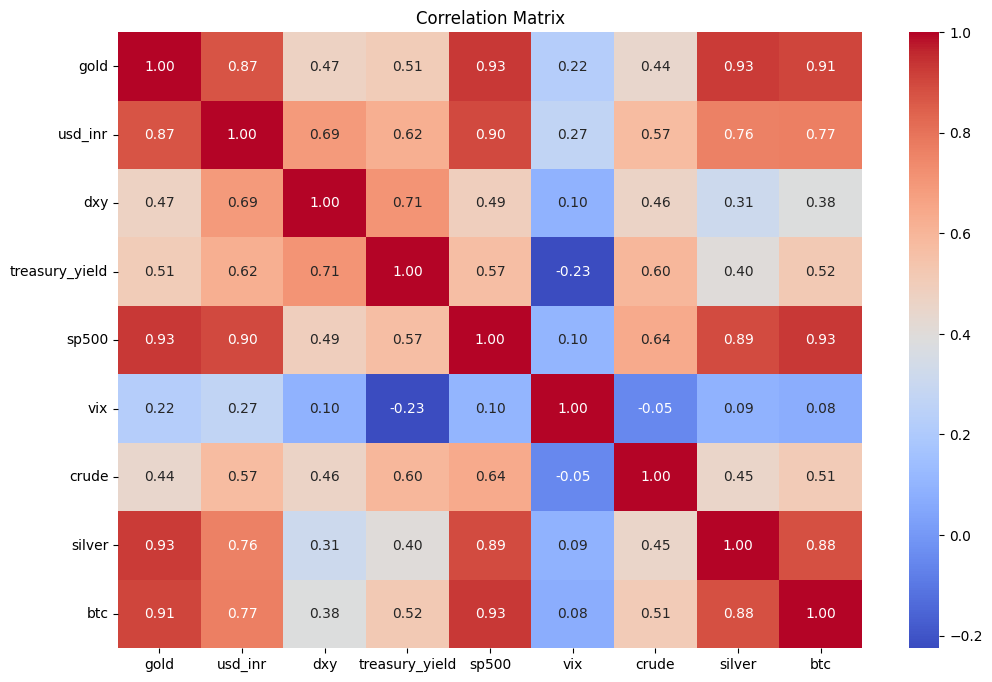

gold              1.000000
sp500             0.930034
silver            0.926871
btc               0.907148
usd_inr           0.871911
treasury_yield    0.505694
dxy               0.472445
crude             0.442199
vix               0.220365
Name: gold, dtype: float64


In [153]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_all.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Focused view: correlations with gold
print(df_all.corr()['gold'].sort_values(ascending=False))


## Key Observations from the Correlation Matrix

Very High Correlation with Target (gold_inr_per_g):

* gold: 1 (as expected, since it's just a conversion)
* sp500: 0.93
* usd_inr: 0.87
* silver: 0.92
* btc: 0.90

These are your strongest predictors and should definitely be included in feature engineering and forecasting models.

Moderate Correlation:

* treasury_yield: 0.50
* dxy: 0.47
* crude: 0.44

These features may offer independent signals — worth including even with lower correlation.

Low Correlation:

* vix: 0.22

lthough low in correlation, vix might still be valuable for capturing market uncertainty and may help non-linear models like XGBoost or Random Forest.

## 1. Feature Selection Strategy
Include highly correlated variables directly.

For variables with moderate or low correlation, create interaction terms, lags, or volatility features — they may not impact directly but influence gold dynamics over time.

## 2. Multicollinearity Check
Some features are highly correlated with each other too (sp500, btc, silver). For linear models, you might consider:

Dropping or combining some of them

Using PCA or regularization (Ridge/Lasso)

## 3. Modeling Insight
For time-series models (ARIMA/SARIMA/Prophet), you can’t use multivariate inputs easily.

For machine learning models (XGBoost, Random Forest, LSTM), all features (and engineered lags/volatility) can be powerful together.



## Step 4: Time Series Plot

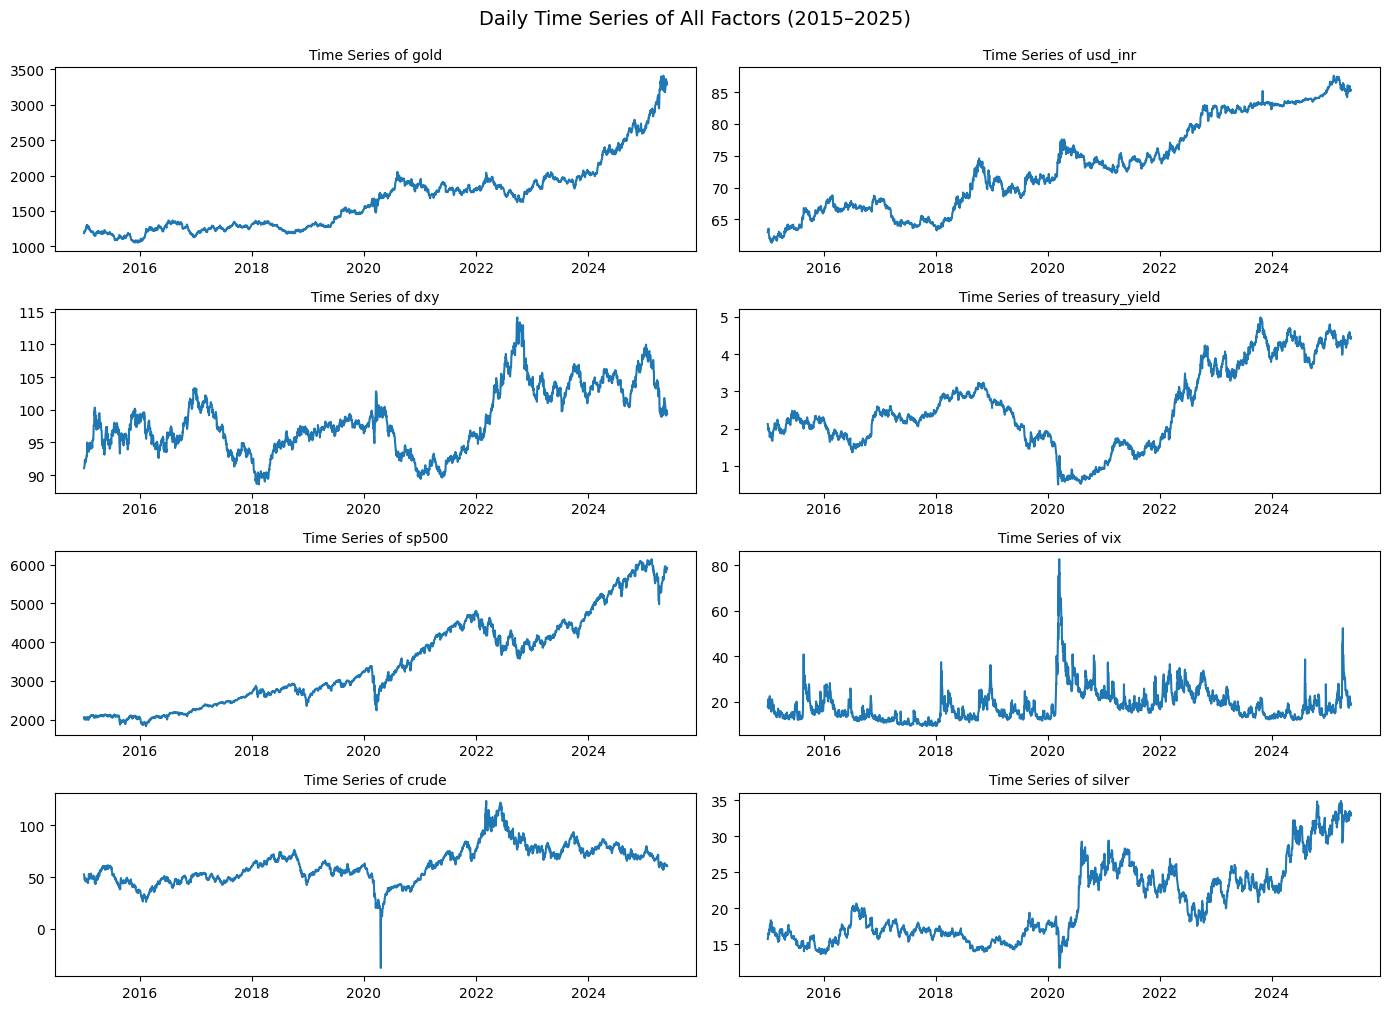

In [154]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(df_all.columns[:-1]):  # excluding 'target'
    plt.subplot(5, 2, i+1)
    plt.plot(df_all.index, df_all[col])
    plt.title(f"Time Series of {col}", fontsize=10)
    plt.tight_layout()
plt.suptitle("Daily Time Series of All Factors (2015–2025)", fontsize=14, y=1.02)
plt.show()

## Observation from plots

**Trending variables (clear upward trend)**:

Gold: Strong steady rise, especially after 2020.

BTC: High volatility with massive spikes (non-stationary).

SP500: Strong uptrend with dips (COVID-19, 2022 bear market).

USD/INR: Gradual depreciation of INR.

These are non-stationary — many ML and statistical models like ARIMA assume stationarity. Differencing may be required later.

**Volatile or non-trending variables**:

VIX: Spikes during crises (COVID-19, market shocks). Mostly low but occasional huge jumps.

Crude: High volatility, especially 2020 (price crash), then a rebound.

Treasury Yield: Cyclical behavior, rising strongly post-2021.

DXY: Mean-reverting tendencies, some cycles.

**Range-bound / mildly trending**:

Silver: Rises post-2020, otherwise more stable.

Gold INR per gram: Derived, so follows gold + USD/INR.

## Step 5: Rolling Average & Volatility for Gold

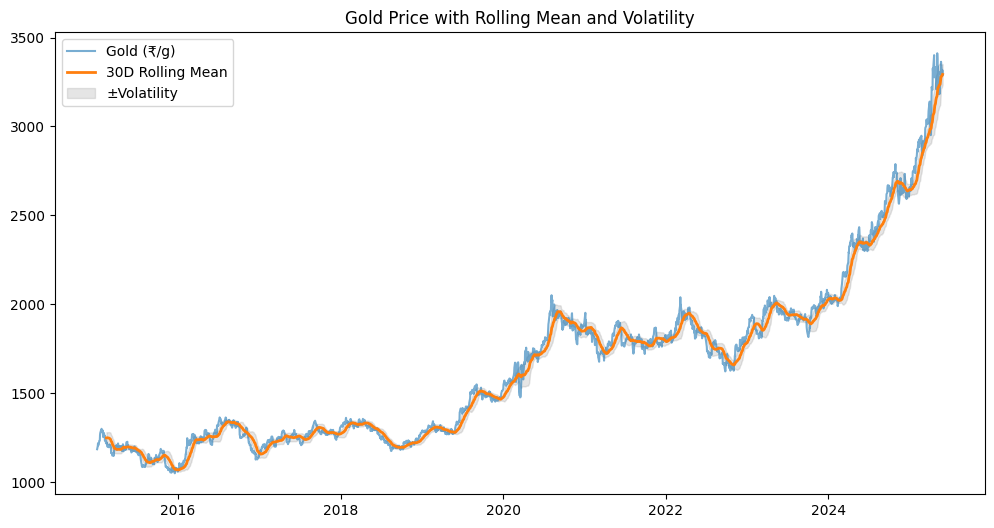

In [155]:
# 30-day rolling mean and volatility (standard deviation)
df_all['gold_rolling_mean'] = df_all['gold'].rolling(window=30).mean()
df_all['gold_volatility'] = df_all['gold'].rolling(window=30).std()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_all['gold'], label='Gold (₹/g)', alpha=0.6)
plt.plot(df_all['gold_rolling_mean'], label='30D Rolling Mean', linewidth=2)
plt.fill_between(df_all.index,
                 df_all['gold_rolling_mean'] - df_all['gold_volatility'],
                 df_all['gold_rolling_mean'] + df_all['gold_volatility'],
                 color='gray', alpha=0.2, label='±Volatility')
plt.title("Gold Price with Rolling Mean and Volatility")
plt.legend()
plt.show()

**Trend**:

* Long-term trend is consistently upward, especially after ~2020.

* The 30-day rolling mean follows closely, meaning short-term noise is relatively low.

**Volatility Spikes**:

* Spikes in volatility are visible especially during:

   * ~March 2020 (COVID crash)

   * ~2022 (Russia-Ukraine conflict, Fed hikes)

   * Late 2024 – possibly a new macroeconomic disruption.

* These spikes coincide with rising gold prices, implying flight to safety.

## Step 6: Distribution 7 Box Plots

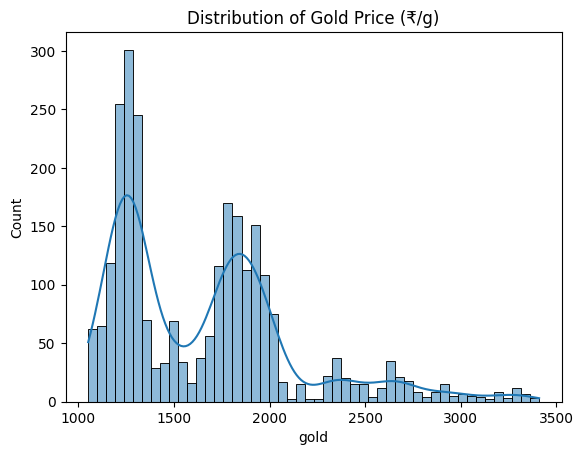

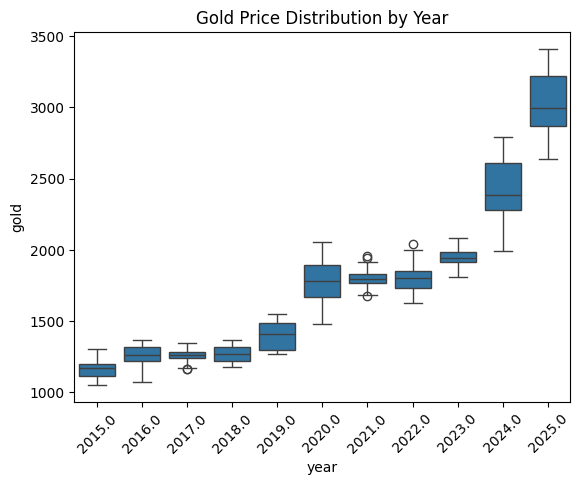

In [156]:
# Distribution of gold price
sns.histplot(df_all['gold'], kde=True, bins=50)
plt.title("Distribution of Gold Price (₹/g)")
plt.show()

# Boxplot by year
df_all.index = pd.to_datetime(df_all.index)
df_all['year'] = df_all.index.year
sns.boxplot(x='year', y='gold', data=df_all)
plt.title("Gold Price Distribution by Year")
plt.xticks(rotation=45)
plt.show()

Right-skewed distribution: Most of the gold price values lie between ₹2500 and ₹5000/g, with fewer observations at higher prices.

Multi-modal peaks: The KDE curve shows multiple peaks, suggesting different periods with distinct price regimes or economic cycles (e.g., pre-COVID, during inflation surges).

Long tail toward higher prices: Indicates more recent years where prices have increased significantly (₹7000–₹9000+).


2015–2018: Gold prices were relatively stable with low volatility.

2019–2021: Notable upward movement; higher spread suggests rising uncertainty or inflation.

2022–2025: Strong surge in both median and variability. 2025 especially stands out with both the highest median and widest spread, showing rapid price acceleration and possible market turbulence.

Outliers become more prominent in recent years, pointing to days with exceptional price spikes.

## Step 7: Pairwise Interaction

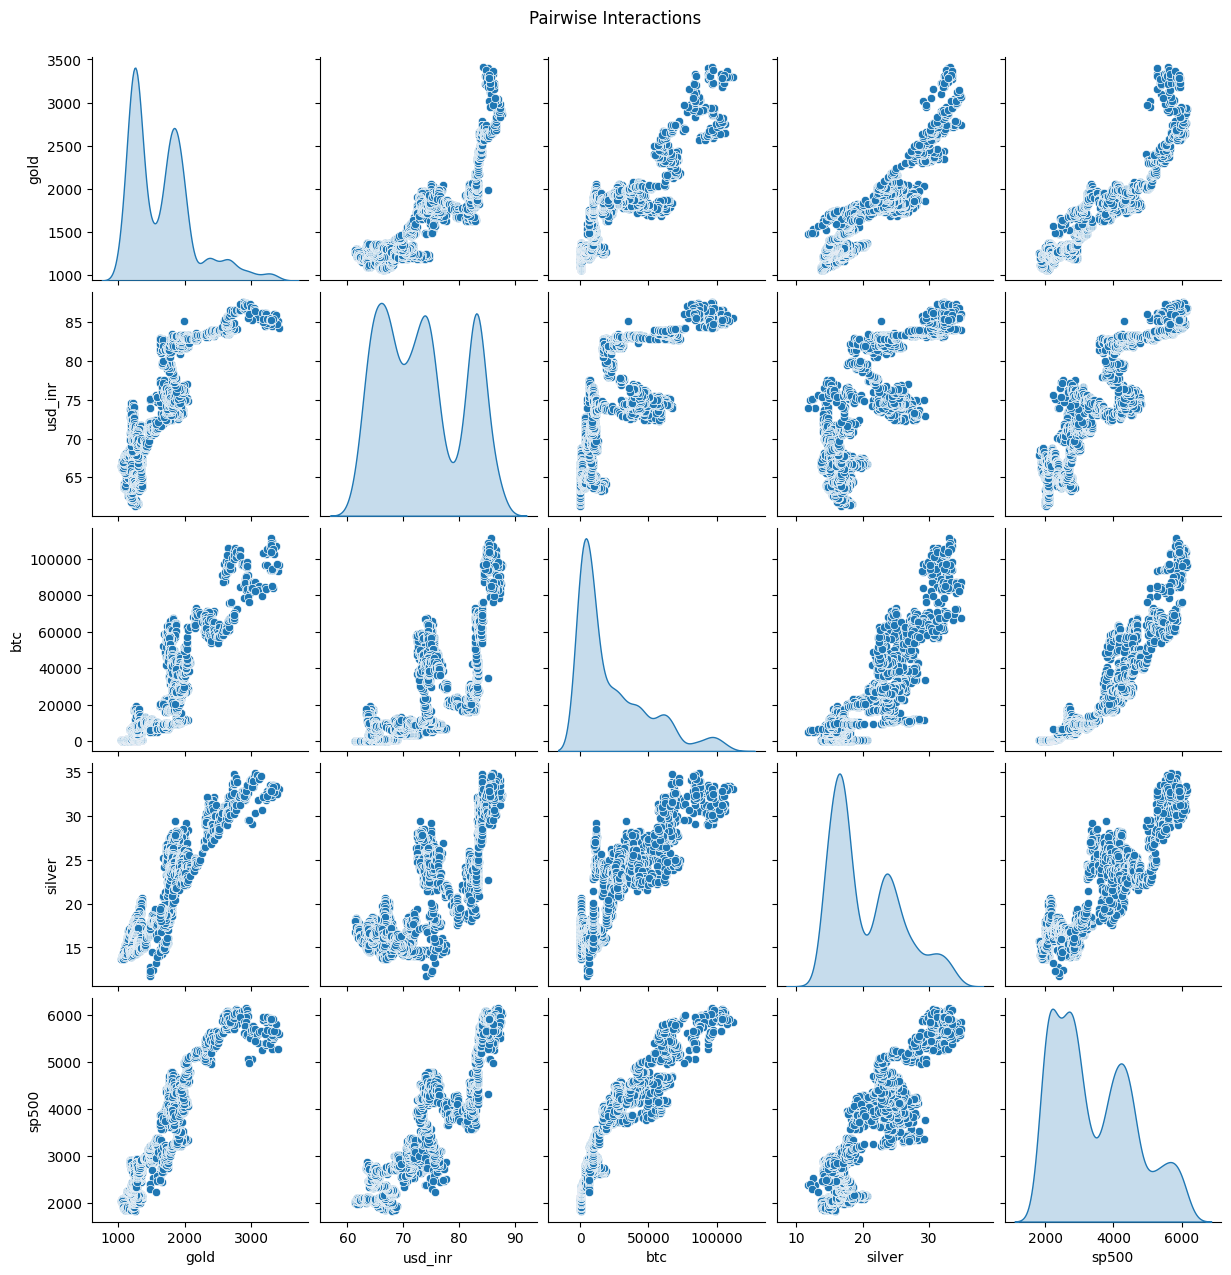

In [157]:
# Focused pairplot
sns.pairplot(df_all[['gold', 'usd_inr', 'btc', 'silver', 'sp500']], diag_kind='kde')
plt.suptitle("Pairwise Interactions", y=1.02)
plt.show()

Gold and US Exchange rates -  Positive linear relationship

Gold and BTC - Moderate positive relationship

Gold and Silver - Positive linear relationship

Gold and S&P 500 - Mild inverse relationship

